In [1]:
%matplotlib inline
import pandas as pd

In [2]:
compras_df = pd.read_csv('./data/clean_compras.csv')
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Dataset General vision

In [3]:
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [4]:
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [5]:
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [6]:
compras_df = compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET']]

## Unidimensional variable analysis

In [7]:
compras_df['SHEET'].value_counts()

SHEET
CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: count, dtype: int64

In [10]:
len(compras_df['CONCEPTO'].unique())

1396

In [11]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: count, dtype: int64

<Axes: >

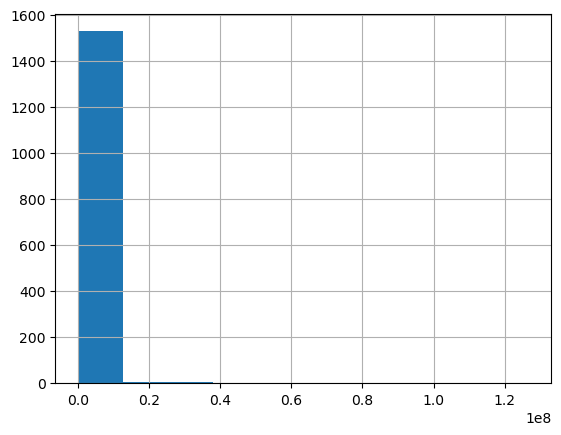

In [12]:
compras_df['IMPORTE'].hist()

<Axes: >

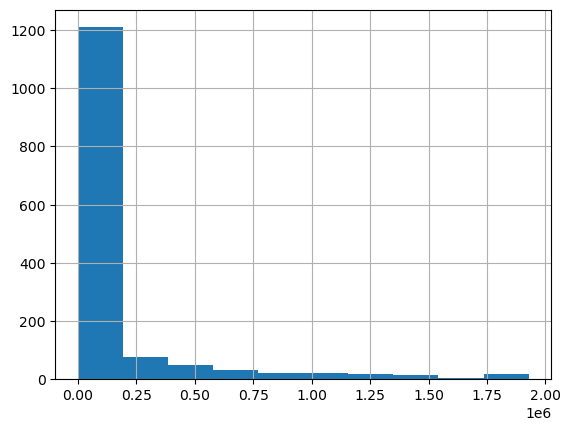

In [13]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

## Multidimensional variable analysis

In [14]:
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [15]:
sum_importe_beneficiario

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

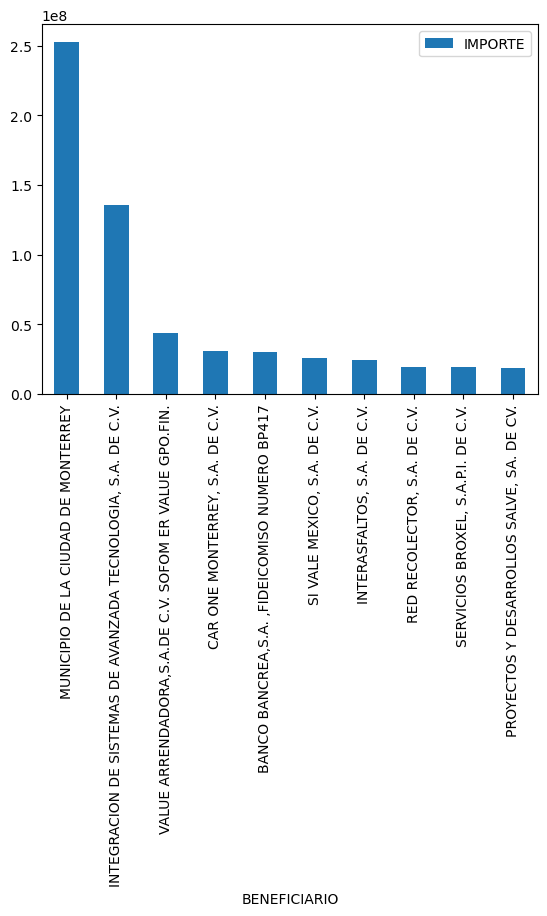

In [24]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [26]:
mean_imported_sheet = compras_df.groupby('SHEET').mean(numeric_only=True)['IMPORTE']

<Axes: xlabel='SHEET'>

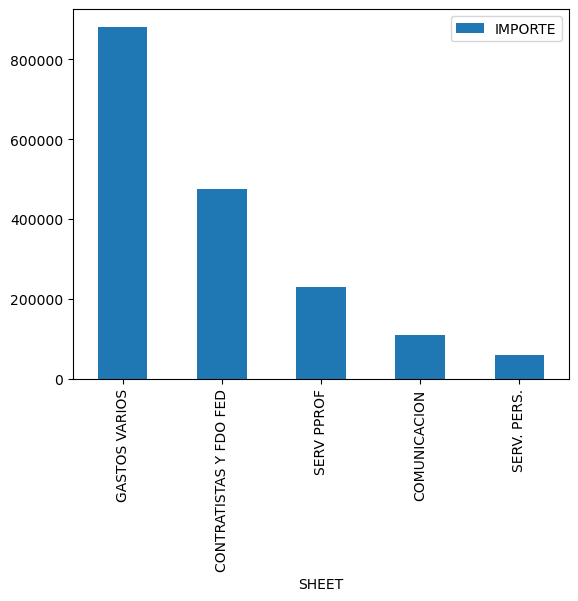

In [27]:
mean_imported_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

In [28]:
mean_imported_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


In [29]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']

In [30]:
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [31]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

<Axes: >

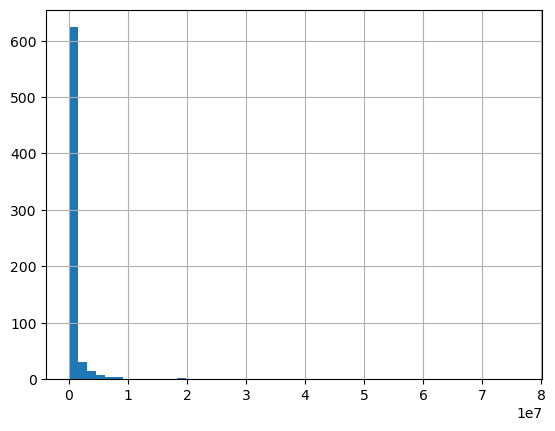

In [33]:
compras_gastos_df['IMPORTE'].hist(bins=50)

In [35]:
compras_gastos_df[compras_gastos_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [37]:
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

SHEET
GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: count, dtype: int64

In [ ]:
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

In [40]:
compras_sheet_beneficiario

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.13
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.14
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [42]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

<Axes: xlabel='BENEFICIARIO'>

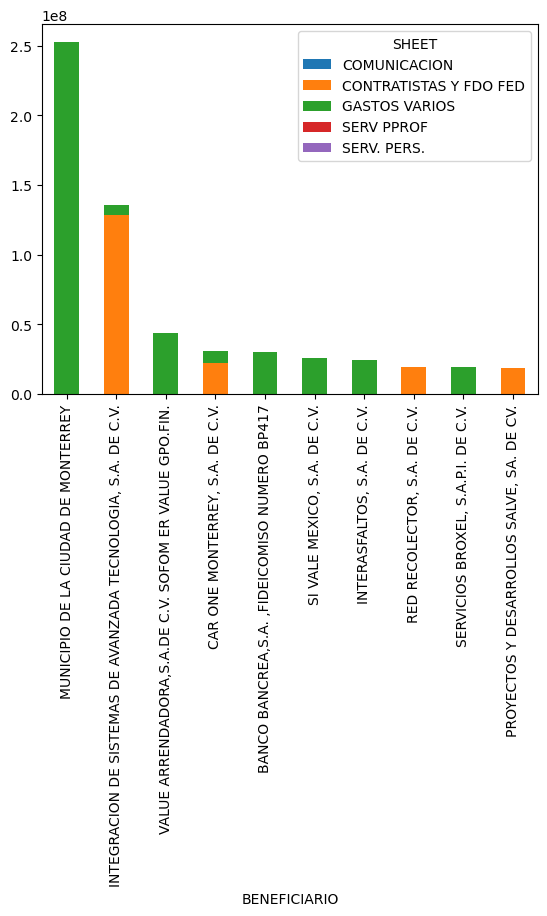

In [45]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked=True)

## Text Analysis

In [46]:
import nltk
from nltk.corpus import stopwords
print(stopwods.words('spanish'))

NameError: name 'stopwods' is not defined